In [1]:
from flash_ansr import FlashANSR, GenerationConfig, install_model, get_path
 
import torch
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [2]:
from drawdata import ScatterWidget

In [3]:
# MODEL = "psaegert/flash-ansr-v7.0"
MODEL = "ansr-models/v17.0/checkpoint_250000"

In [4]:
# install_model(MODEL)

In [5]:
nsr = FlashANSR.load(
    directory=get_path('models', MODEL),
    # generation_config=GenerationConfig(method='beam_search', beam_width=128 * 16, equivalence_pruning=True),
    generation_config=GenerationConfig(method='softmax_sampling', choices=1024 * 32),
    parsimony=0.05
).to(device)

In [6]:
widget = ScatterWidget()
widget

ScatterWidget()

In [7]:
X_raw, y_raw = widget.data_as_X_y

# Scale X_raw and y_raw to (-10, 10)
X = (X_raw - X_raw.min(axis=0)) / (X_raw.max(axis=0) - X_raw.min(axis=0)) * 20 - 10
y = (y_raw - y_raw.min(axis=0)) / (y_raw.max(axis=0) - y_raw.min(axis=0)) * 20 - 10

In [8]:
nsr.fit(X, y, verbose=True)

Fitting Constants: 100%|██████████| 10053/10053 [00:08<00:00, 1190.37it/s]


In [23]:
nsr.compile_results(parsimony=0.01)

In [30]:
nsr.get_expression()

'(14.75 * (-0.73 + atan((0.03 * pow2((3.6 + x1))))))'

In [24]:
nsr.results

,log_prob,fvu,score,expression,complexity,target_complexity,numeric_prediction,raw_beam,beam,raw_beam_decoded,function,refiner,beam_id,fit_constants,fit_covariances,fit_loss
0,-17.127934,0.041027,-1.276932,"[*, <constant>, +, <constant>, atan, *, <const...",11,None,None,"[1, 17, 6, 15, 6, 36, 17, 6, 23, 15, 6, 47, 2]","[17, 6, 15, 6, 36, 17, 6, 23, 15, 6, 47]","[*, <constant>, +, <constant>, atan, *, <const...",<function <lambda> at 0x789de4a459e0>,"Refiner(expression=['*', '<constant>', '+', '<...",0,"[14.747381893226803, -0.7280251851408542, 0.03...","[[0.15361090921514728, 0.002657756003273948, -...",1.949758
1,-16.820365,0.050386,-1.197687,"[+, *, <constant>, x1, -, exp, *, <constant>, ...",10,None,None,"[1, 15, 17, 6, 47, 16, 37, 17, 6, 47, 6, 2]","[15, 17, 6, 47, 16, 37, 17, 6, 47, 6]","[+, *, <constant>, x1, -, exp, *, <constant>, ...",<function <lambda> at 0x789de4ab3a60>,"Refiner(expression=['+', '*', '<constant>', 'x...",1,"[1.807176783053915, -0.34212809976763003, 5.44...","[[0.001932477030419885, -0.0001015946422730781...",2.394560
2,-10.844913,0.052800,-1.197364,"[*, <constant>, cos, /, -, x1, <constant>, <co...",8,None,None,"[1, 17, 6, 32, 18, 16, 47, 6, 6, 2]","[17, 6, 32, 18, 16, 47, 6, 6]","[*, <constant>, cos, /, -, x1, <constant>, <co...",<function <lambda> at 0x789e38b80c20>,"Refiner(expression=['*', '<constant>', 'cos', ...",2,"[-10.30175281552061, -3.3996868052927343, 3.47...","[[0.08785283597751303, 0.0014294252312505341, ...",2.509274
3,-11.370604,0.052800,-1.197364,"[*, <constant>, sin, /, +, <constant>, x1, <co...",8,None,None,"[1, 17, 6, 31, 18, 15, 6, 47, 6, 2]","[17, 6, 31, 18, 15, 6, 47, 6]","[*, <constant>, sin, /, +, <constant>, x1, <co...",<function <lambda> at 0x789e38448860>,"Refiner(expression=['*', '<constant>', 'sin', ...",3,"[10.301752802066959, -2.0555841223292797, 3.47...","[[0.08785284397187716, 0.004682499495167561, -...",2.509274
4,-10.891993,0.052800,-1.197364,"[*, <constant>, cos, -, /, x1, <constant>, <co...",8,None,None,"[1, 17, 6, 32, 16, 18, 47, 6, 6, 2]","[17, 6, 32, 16, 18, 47, 6, 6]","[*, <constant>, cos, -, /, x1, <constant>, <co...",<function <lambda> at 0x789e397620c0>,"Refiner(expression=['*', '<constant>', 'cos', ...",4,"[10.301753306999938, -3.472932874991857, -14.7...","[[0.08785302126189651, 0.0020710100952720427, ...",2.509274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10048,-39.535801,NaN,NaN,"[*, <constant>, cos, pow3, *, <constant>, *, c...",16,None,None,"[1, 17, 6, 32, 24, 17, 6, 17, 32, 47, 15, 47, ...","[17, 6, 32, 24, 17, 6, 17, 32, 47, 15, 47, 24,...","[*, <constant>, cos, pow3, *, <constant>, *, c...",<function <lambda> at 0x789dcbfc2660>,"Refiner(expression=['*', '<constant>', 'cos', ...",10048,"[-4.509865894744381, -3.2339081742041387, -1.5...","[[inf, inf, inf], [inf, inf, inf], [inf, inf, ...",NaN
10049,-39.999585,NaN,NaN,"[-, atan, *, <constant>, *, x1, sin, x1, *, <c...",16,None,None,"[1, 16, 36, 17, 6, 17, 47, 31, 47, 17, 6, 29, ...","[16, 36, 17, 6, 17, 47, 31, 47, 17, 6, 29, 17,...","[-, atan, *, <constant>, *, x1, sin, x1, *, <c...",<function <lambda> at 0x789dcbf7e020>,"Refiner(expression=['-', 'atan', '*', '<consta...",10049,"[-4.044587317010983, -2.999056465085248, -3.13...","[[inf, inf, inf], [inf, inf, inf], [inf, inf, ...",NaN
10050,-42.785884,NaN,NaN,"[+, -, pow2, *, <constant>, x1, x1, inv, pow2,...",15,None,None,"[1, 15, 16, 23, 17, 6, 47, 47, 20, 23, 28, 29,...","[15, 16, 23, 17, 6, 47, 47, 20, 23, 28, 29, 27...","[+, -, pow2, *, <constant>, x1, x1, inv, pow2,...",<function <lambda> at 0x789dcbe728e0>,"Refiner(expression=['+', '-', 'pow2', '*', '<c...",10050,"[0.6082555334770863, -4.459918271851874]","[[inf, inf], [inf, inf]]",NaN
10051,-43.504044,NaN,NaN,"[+, -, pow1_5, pow3, x1, <constant>, pow1_3, /...",12,None,None,"[1, 15, 16, 30, 24, 47, 6, 28, 18, 47, 17, 6, ...","[15, 16, 30, 24, 47, 6, 28, 18, 47, 17, 6, 54]","[+, -, pow1_5, pow3, x1, <constant>, pow1_3, /...",<function <lambda> at 0x789dcbd42c00>,"Refin

In [25]:
X_linspace = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

In [26]:
y_pred = [[nsr.predict(X, nth_best_beam=beam_id, nth_best_constants=fit_id) for fit_id in range(len(result['fits'])) if np.isfinite(result['score'])] for beam_id, result in enumerate(nsr._results)]
y_pred_linspace = [[nsr.predict(X_linspace, nth_best_beam=beam_id, nth_best_constants=fit_id) for fit_id in range(len(result['fits'])) if np.isfinite(result['score'])] for beam_id, result in enumerate(nsr._results)]

/home/psaegert/miniconda3/envs/flash-ansr/lib/python3.13/site-packages/simplipy/operators.py:154: RuntimeWarning: invalid value encountered in power
  x = np.where(x < 0, -(-x) ** (1 / 5), x ** (1 / 5))
/home/psaegert/miniconda3/envs/flash-ansr/lib/python3.13/site-packages/simplipy/operators.py:113: RuntimeWarning: invalid value encountered in power
  x = np.where(x < 0, -(-x) ** (1 / 3), x ** (1 / 3))
/home/psaegert/miniconda3/envs/flash-ansr/lib/python3.13/site-packages/simplipy/operators.py:489: RuntimeWarning: overflow encountered in exp
  return np.exp(x)
/home/psaegert/miniconda3/envs/flash-ansr/lib/python3.13/site-packages/simplipy/operators.py:512: RuntimeWarning: divide by zero encountered in log
  return np.log(x)
/home/psaegert/miniconda3/envs/flash-ansr/lib/python3.13/site-packages/simplipy/operators.py:282: RuntimeWarning: invalid value encountered in arcsin
  return np.arcsin(x)


In [28]:
y_pred = y_pred[:32]
y_pred_linspace = y_pred_linspace[:32]

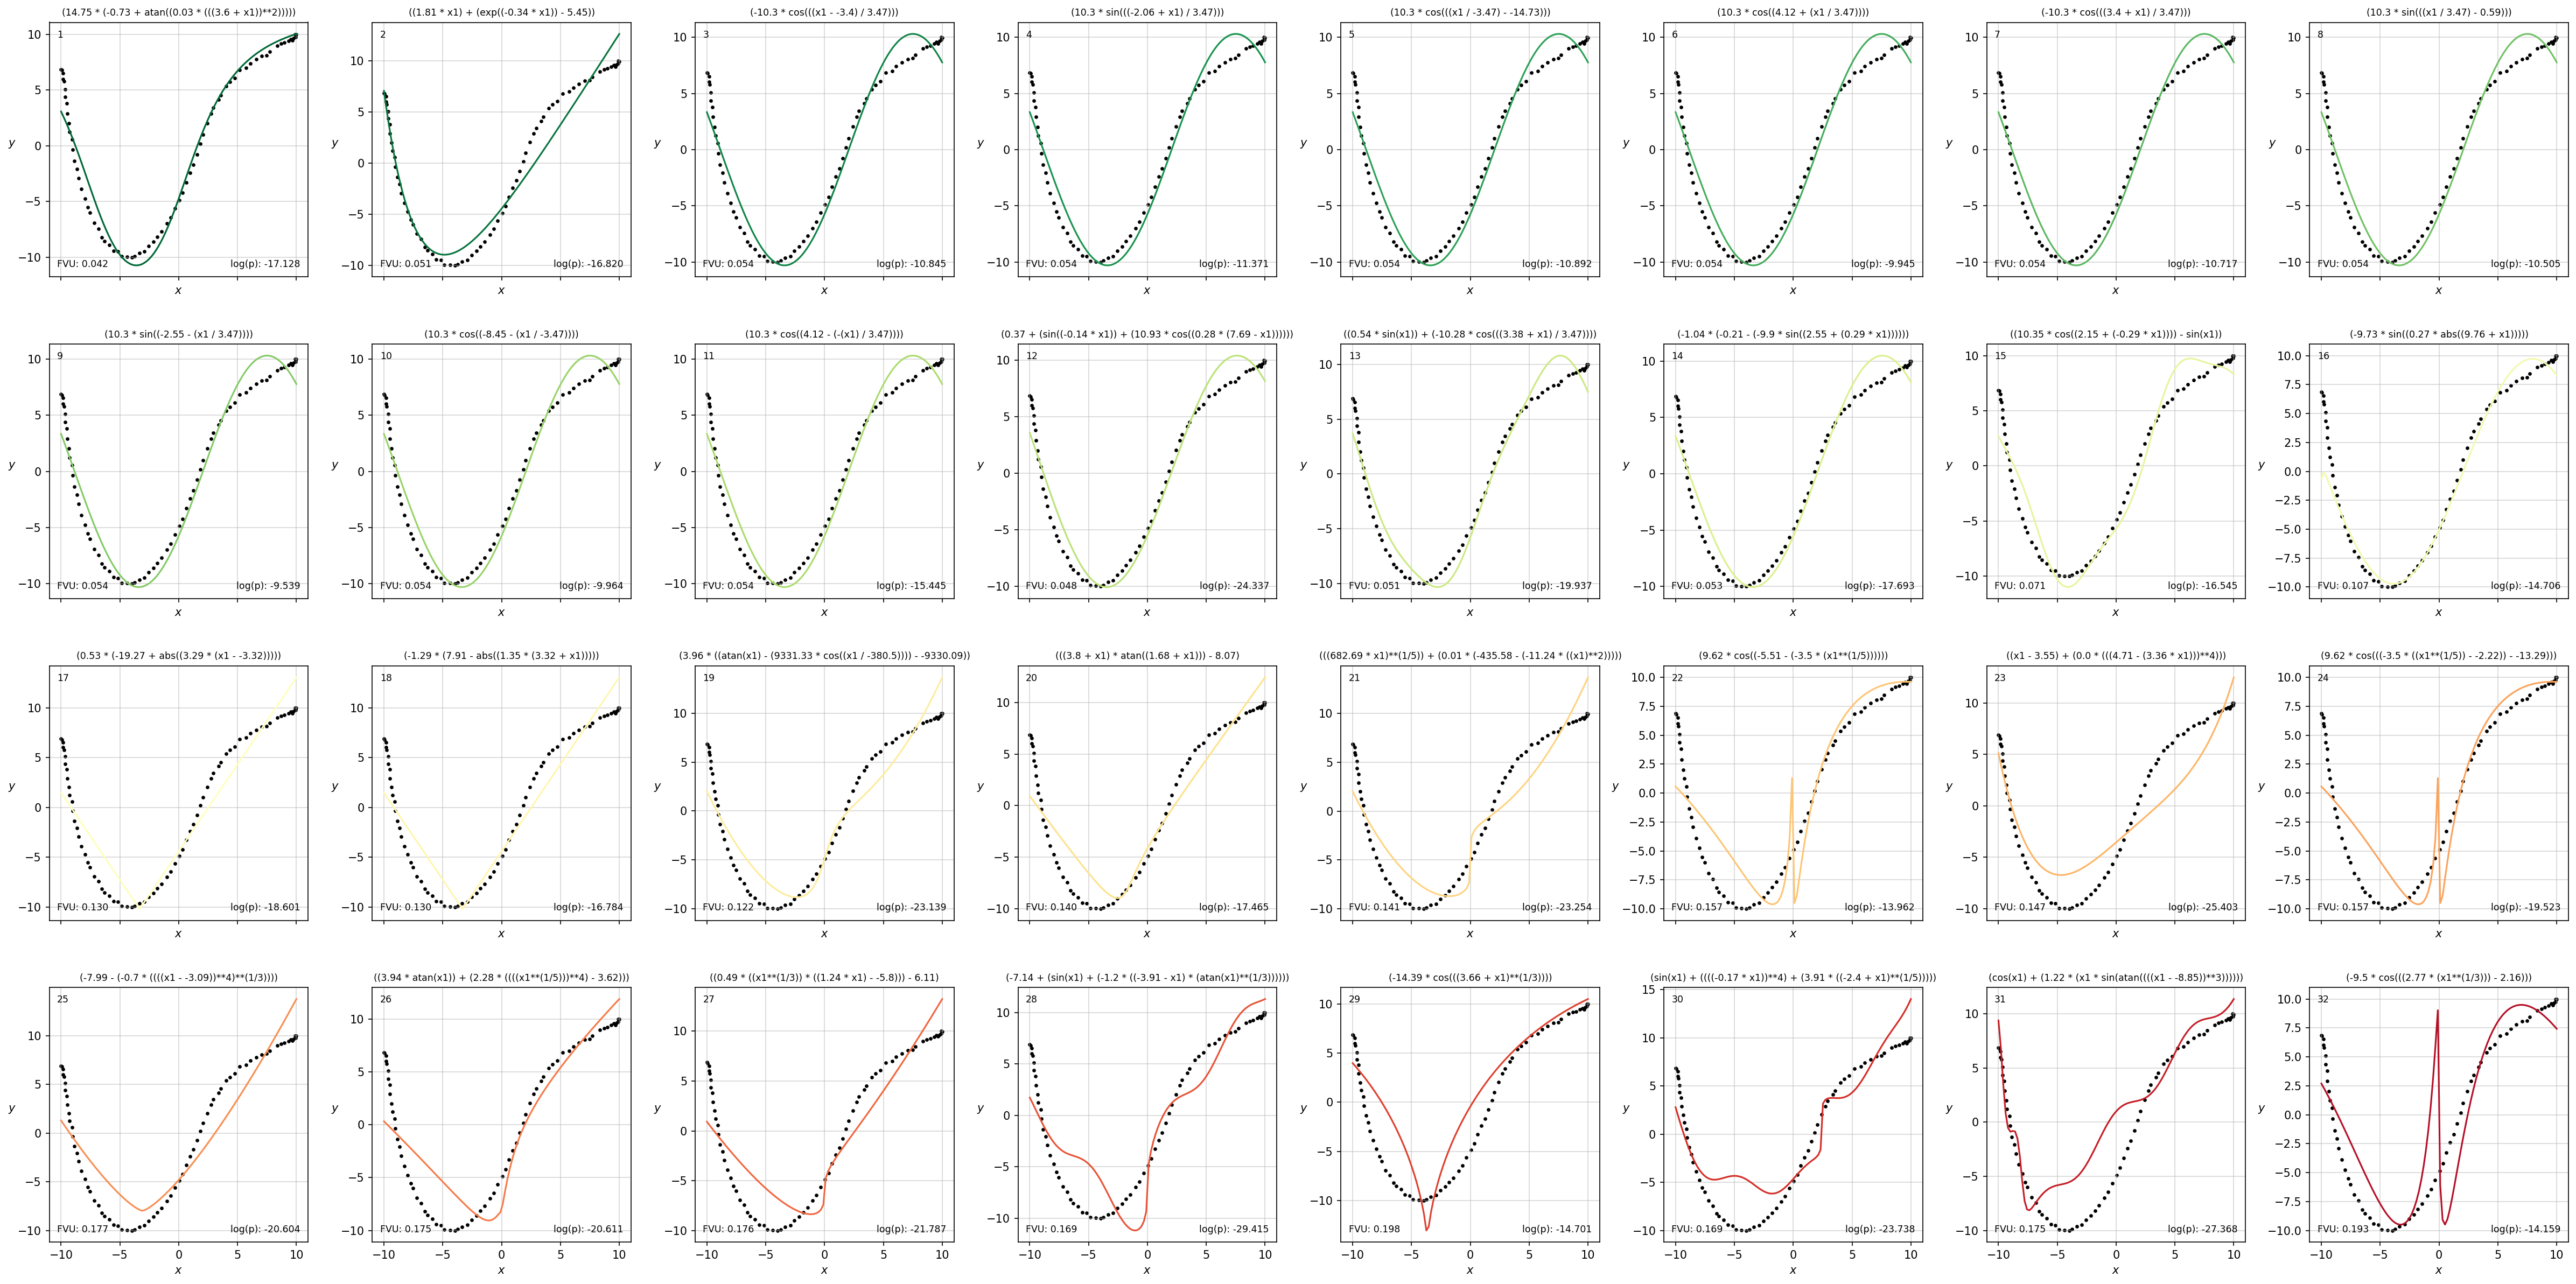

In [29]:
COLS = 8
ROWS = np.ceil(len(y_pred) / COLS).astype(int)

fig, axs = plt.subplots(ROWS, COLS, figsize=(COLS * 4, ROWS * 4), dpi=150, sharex=True)

for i, ax in enumerate(axs.flat):
    if i >= len(y_pred) or len(y_pred[i]) == 0:
        ax.axis('off')
        continue
    fvu = np.mean((y_pred[i][0][:, 0] - y)**2) / np.var(y)
    expression_pred_transformed = nsr._results[i]['refiner'].transform(nsr._results[i]['expression'], 0, return_prefix=True)
    expression_pred_transformed_infix = nsr.simplipy_engine.prefix_to_infix(expression_pred_transformed, power='**')

    ax.plot(X_linspace, y_pred_linspace[i][0], color=plt.get_cmap('RdYlGn')(1 - i / len(y_pred)))
    ax.scatter(X, y, color='k', s=5)
    ax.set_title(expression_pred_transformed_infix, fontsize='small')
    
    ax.annotate(f'{i + 1}', xy=(0.03, 0.97), xycoords='axes fraction', ha='left', va='top', fontsize='small')
    ax.annotate(f'FVU: {fvu:.3f}', xy=(0.03, 0.03), xycoords='axes fraction', ha='left', va='bottom', fontsize='small')
    ax.annotate(f'log(p): {nsr._results[i]["log_prob"]:.3f}', xy=(0.97, 0.03), xycoords='axes fraction', ha='right', va='bottom', fontsize='small')

    ax.grid(alpha=0.5)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$', rotation=0, labelpad=5)

fig.tight_layout(h_pad=3)

Text(0, 0.5, 'Complexity')

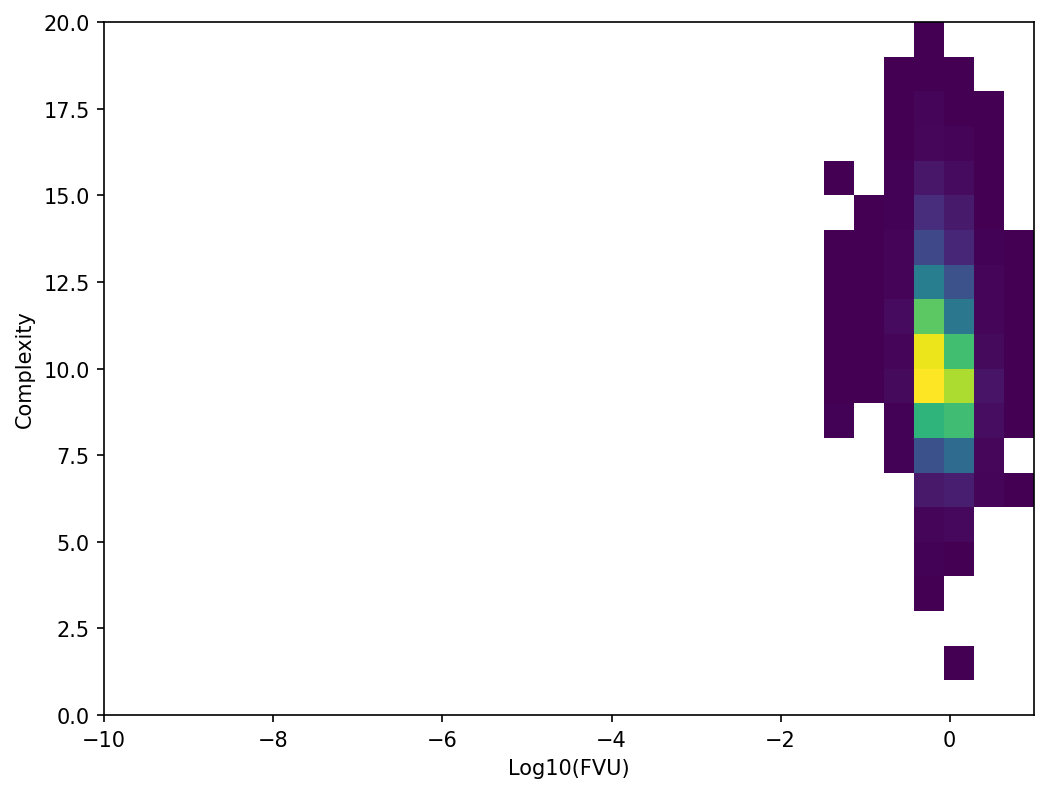

In [16]:
# plot the fvu against the complexity
fig, ax = plt.subplots(figsize=(8, 6), dpi=150)
ax.hist2d(np.log10(nsr.results['fvu']), nsr.results['complexity'], bins=(np.linspace(-10, 1, 32), np.linspace(0, 20, 21)), cmin=1);
ax.set_xlabel('Log10(FVU)')
ax.set_ylabel('Complexity')